# Importamos librerías

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Carga de datos MNIST

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train[0].shape

len(x_train)

60000

# Visualizacion de una Imagen

5

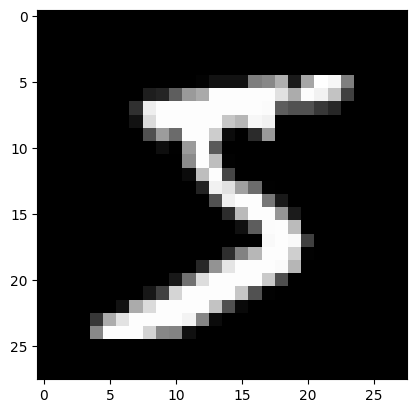

In [3]:
plt.imshow(x_train[0], cmap = 'gray',  vmin=0, vmax=255)
y_train[0]

# Normalización de los datos de entrada

In [4]:
x_train = x_train / 255
x_test = x_test / 255
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Aplanamiento de las imágenes

In [5]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)
x_train_flatten.shape 
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Definimos el modelo de la red neuronal

In [6]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid' )
])

# Compilación, Entrenamiento y Evaluacion del Modelo

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy'),
model.fit(x_train_flatten, y_train, epochs=5)

model.evaluate(x_test_flatten, y_test)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4621 - accuracy: 0.8810
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3033 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2832 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9234
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.2658 - accuracy: 0.9256


[0.26580214500427246, 0.925599992275238]

# Predecir etiquetas de datos de prueba como numeros enteros y calcular la matriz de confusion

In [8]:
y_predicted = model.predict(x_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

313/313 [==============================] - 0s 710us/step


# Mostrar la matriz de confusion en un mapa de calor

Text(95.72222222222221, 0.5, 'Truth')

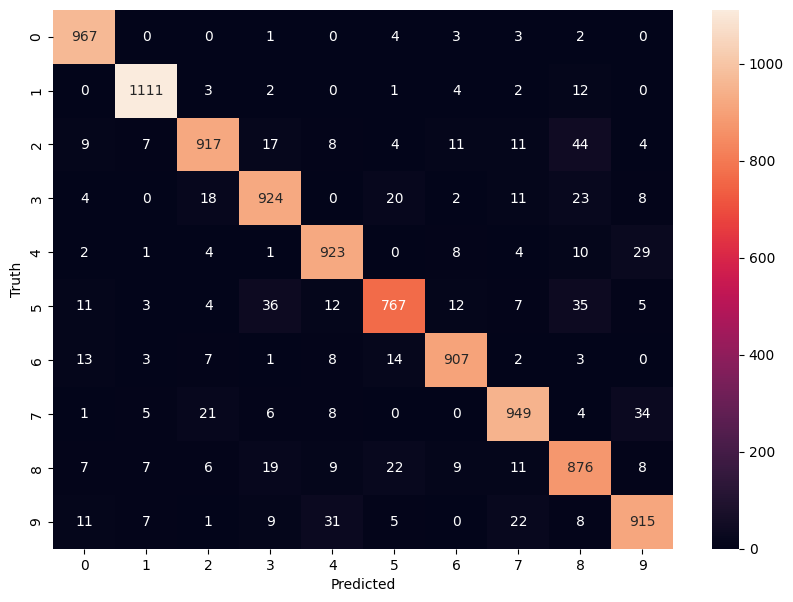

In [9]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Imprimir imagen de ejemplo

y_test: 7


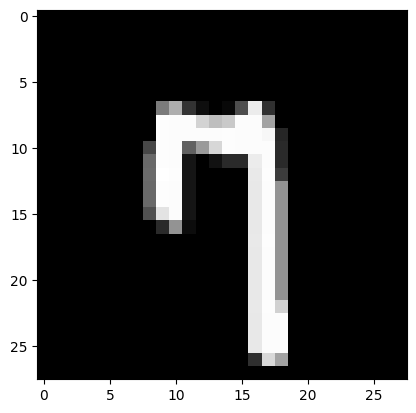

In [10]:
plt.imshow(x_test[80], cmap='gray', vmin=0, vmax=1)
print(f'y_test: {y_test[80]}')

# Predecir y comparar la imagen de ejemplo con la etiqueta real

In [11]:
y_predicted = model.predict(x_test_flatten)
np.argmax(y_predicted[80])
print(y_test[80] == np.argmax(y_predicted[80]))
print(y_test[80])

313/313 [==============================] - 0s 1ms/step
True
7


# Creación de otro modelo con mas capas ocultas

In [12]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')  #100 capas ocultas y 10 de salidas.
])

# Compilación, Entrenamiento y Evaluación del Modelo

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flatten, y_train, epochs=5)
model.evaluate(x_test_flatten,y_test)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2629 - accuracy: 0.9258
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1182 - accuracy: 0.9657
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0820 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0627 - accuracy: 0.9808
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0783 - accuracy: 0.9758


[0.07833556830883026, 0.9757999777793884]

# Predecir etiquetas de datos de prueba como numeros enteros y calcular la matriz de confusion

In [14]:
y_predicted = model.predict(x_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

313/313 [==============================] - 0s 811us/step


# Crea un nuevo modelo secuencial con dos capas ocultas de 100 neuronas cada una y funciones de activación relu y sigmoidal

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Compilacion, Entrenamiento y Evaluación

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test,y_test)


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9222
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1241 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0877 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0671 - accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0536 - accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0432 - accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0351 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0292 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0246 - accuracy: 0.9923
Epoch 10/10
313/313 [==============================] - 0s 891us/step - loss: 0.077

[0.07745926827192307, 0.978600025177002]